# Storytelling Data Visualization on Exchange Rates¶
### Introducing the Dataset

In [136]:
import pandas as pd
exchange_rates=pd.read_csv('euro-daily-hist_1999_2020.csv')
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-05-06,1.5547,1.9558,6.4707,1.4764,1.0953,7.8054,NaN,25.847,7.4360,...,4.9264,89.8825,10.1940,1.6096,NaN,NaN,37.7120,10.0490,1.2060,17.2081
1,2021-05-05,1.5510,1.9558,6.5174,1.4731,1.0965,7.7636,NaN,25.825,7.4360,...,4.9271,89.7964,10.1945,1.6035,NaN,NaN,37.3660,10.0174,1.2005,17.3013
2,2021-05-04,1.5608,1.9558,6.5785,1.4836,1.0980,7.8136,NaN,25.841,7.4361,...,4.9275,90.2438,10.1673,1.6073,NaN,NaN,37.4750,10.0110,1.2021,17.4433
3,2021-05-03,1.5573,1.9558,6.5507,1.4807,1.1016,7.7967,NaN,25.773,7.4365,...,4.9269,90.7472,10.1803,1.6044,NaN,NaN,37.5650,10.0087,1.2044,17.3953
4,2021-04-30,1.5581,1.9558,6.4597,1.4834,1.0998,7.8134,NaN,25.883,7.4360,...,4.9285,90.7108,10.1640,1.6045,NaN,NaN,37.6480,9.9777,1.2082,17.3875


In [137]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5776,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5777,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5778,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5779,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5780,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [138]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5781 entries, 0 to 5780
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5781 non-null   object 
 1   [Australian dollar ]      5781 non-null   object 
 2   [Bulgarian lev ]          5379 non-null   object 
 3   [Brazilian real ]         5513 non-null   object 
 4   [Canadian dollar ]        5781 non-null   object 
 5   [Swiss franc ]            5781 non-null   object 
 6   [Chinese yuan renminbi ]  5513 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5781 non-null   object 
 9   [Danish krone ]           5781 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5781 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5781 non-null   object 
 14  [Croatia

### Data Cleaning

In [139]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [140]:
euro_to_dollar=exchange_rates[['Time', 'US_dollar']].copy()
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.2713     6
          ..
1.3443     1
1.1529     1
0.9485     1
1.1216     1
1.2813     1
Name: US_dollar, Length: 3549, dtype: int64

In [141]:
euro_to_dollar=euro_to_dollar[euro_to_dollar['US_dollar']!='-']
euro_to_dollar['US_dollar']=euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5719 entries, 0 to 5780
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5719 non-null   datetime64[ns]
 1   US_dollar  5719 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 134.0 KB


### Rolling Mean

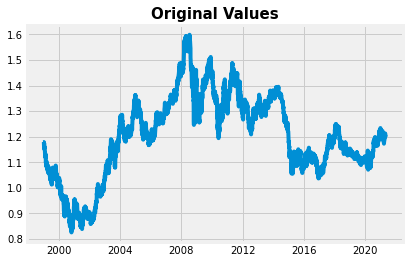

In [142]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Original Values', weight='bold', size=15)
plt.show()

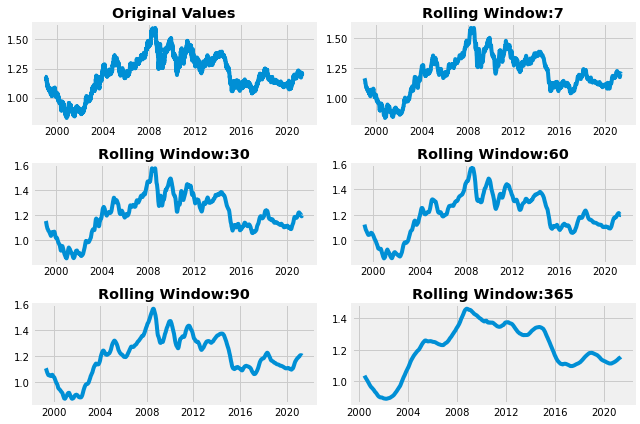

In [143]:
plt.figure(figsize=(9,6))
plt.subplot(3, 2, 1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Original Values', weight='bold')

for i, n in zip([2, 3, 4, 5, 6], [7, 30, 60, 90, 365]):
    plt.subplot(3, 2, i)
    plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'].rolling(n).mean())
    plt.title('Rolling Window:'+ str(n), weight='bold')
             

plt.tight_layout()
plt.show()

### EURO-USD Exchange Rates under Different Presidents

<ipython-input-193-7de56d2a2585>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '','2007', '', '2009'],alpha=0.3)
<ipython-input-193-7de56d2a2585>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '','2015', '', '2017'],alpha=0.3)
<ipython-input-193-7de56d2a2585>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['2017', '', '2018', '', '2019', '','2020', '', '2021'],alpha=0.3)


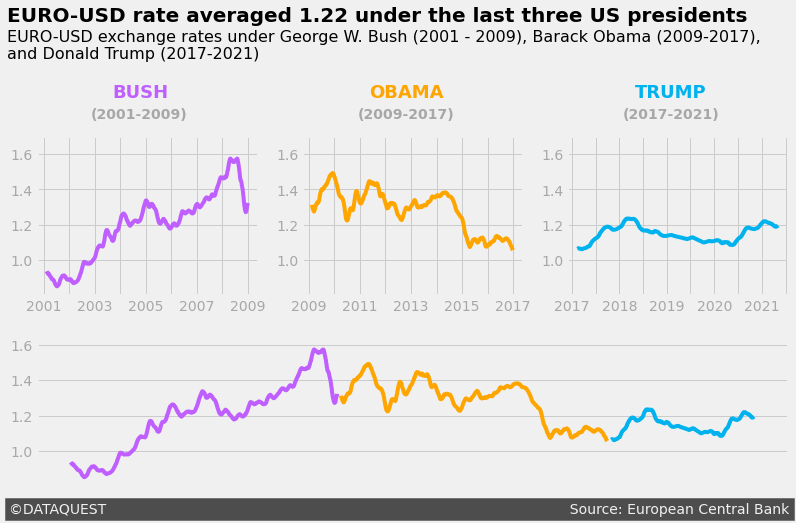

In [193]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)

euro_to_dollar['Time']=pd.to_datetime(euro_to_dollar['Time'])
euro_to_dollar['year']=euro_to_dollar['Time'].dt.year


### BUSH
BU_euro_to_dollar=euro_to_dollar[(euro_to_dollar['year']>=2001) & (euro_to_dollar['year']<2009)]
ax1.plot(BU_euro_to_dollar['Time'], BU_euro_to_dollar['US_dollar'].rolling(30).mean(), color='#BF5FFF')
ax1.set_ylim((0.8, 1.7))
ax1.set_yticks([1.0, 1.2, 1.4, 1.6])
ax1.set_yticklabels([1.0, 1.2, 1.4, 1.6], alpha=0.3)
ax1.set_xticklabels([])
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '','2007', '', '2009'],alpha=0.3)
ax1.text(12300, 1.92, 'BUSH', fontsize=18, weight='bold', color='#BF5FFF')
ax1.text(12000, 1.8, '(2001-2009)', weight='bold', alpha=0.3)


### OBAMA
OB_euro_to_dollar=euro_to_dollar[(euro_to_dollar['year']>=2009) & (euro_to_dollar['year']<2017)]
ax2.plot(OB_euro_to_dollar['Time'], OB_euro_to_dollar['US_dollar'].rolling(30).mean(), color='#ffa500')
ax2.set_ylim((0.8, 1.7))
ax2.set_yticks([1.0, 1.2, 1.4, 1.6])
ax2.set_yticklabels([1.0, 1.2, 1.4, 1.6], alpha=0.3)
ax2.set_xticklabels([])
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '','2015', '', '2017'],alpha=0.3)
ax2.text(15100, 1.92, 'OBAMA', fontsize=18, weight='bold', color='#ffa500')
ax2.text(14950, 1.8, '(2009-2017)', weight='bold', alpha=0.3)


###TRUMP
TR_euro_to_dollar=euro_to_dollar[(euro_to_dollar['year']>=2017)]
ax3.plot(TR_euro_to_dollar['Time'], TR_euro_to_dollar['US_dollar'].rolling(30).mean(), color='#00B2EE')
ax3.set_ylim((0.8, 1.7))
ax3.set_yticks([1.0, 1.2, 1.4, 1.6])
ax3.set_yticklabels([1.0, 1.2, 1.4, 1.6], alpha=0.3)
ax3.set_xticklabels([])
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '','2020', '', '2021'],alpha=0.3)
ax3.text(17650, 1.92, 'TRUMP', fontsize=18, weight='bold', color='#00B2EE')
ax3.text(17560, 1.8, '(2017-2021)', weight='bold', alpha=0.3)


###Total
ax4.plot(BU_euro_to_dollar['Time'], BU_euro_to_dollar['US_dollar'].rolling(30).mean(), color='#BF5FFF')
ax4.plot(OB_euro_to_dollar['Time'], OB_euro_to_dollar['US_dollar'].rolling(30).mean(), color='#ffa500')
ax4.plot(TR_euro_to_dollar['Time'], TR_euro_to_dollar['US_dollar'].rolling(30).mean(), color='#00B2EE')
ax4.set_ylim((0.8, 1.7))
ax4.set_yticks([1.0, 1.2, 1.4, 1.6])
ax4.set_yticklabels([1.0, 1.2, 1.4, 1.6], alpha=0.3)
ax4.set_xticklabels([])
ax4.set_xticks([])

ax1.text(10800, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents', fontsize=20, weight='bold')
ax1.text(10800, 2.14, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''', fontsize=16)

ax4.text(10700, 0.65, '©DATAQUEST' + ' '*103 + 'Source: European Central Bank', color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)

plt.show()